In [ ]:
%pip install seaborn
%pip install sklearn

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# First Glance

In [ ]:
def load_dataset(url):
  df = pd.read_csv(url)
  return df
boston_dataframe = load_dataset("/content/drive/MyDrive/Astrum_DS/Qwasar_Projects/My Tu Verras/boston.csv")

def print_summarize_dataset(dataset):
  print("Dataset dimension:")
  print(dataset.size)
  print("First 10 rows of dataset:")
  print(dataset.head(10))
  print("Statistical summary:")
  print(dataset.describe())

print_summarize_dataset(boston_dataframe)

In [ ]:
boston_dataframe

In [ ]:
boston_dataframe.corr()

# Cleaning and Pre-processing


In [ ]:
def clean_dataset(dataset):

  miss = boston_dataframe.isnull().sum()
  print(miss)
  
clean_dataset(boston_dataframe)

In [ ]:
boston_dataframe[0:50]

# Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


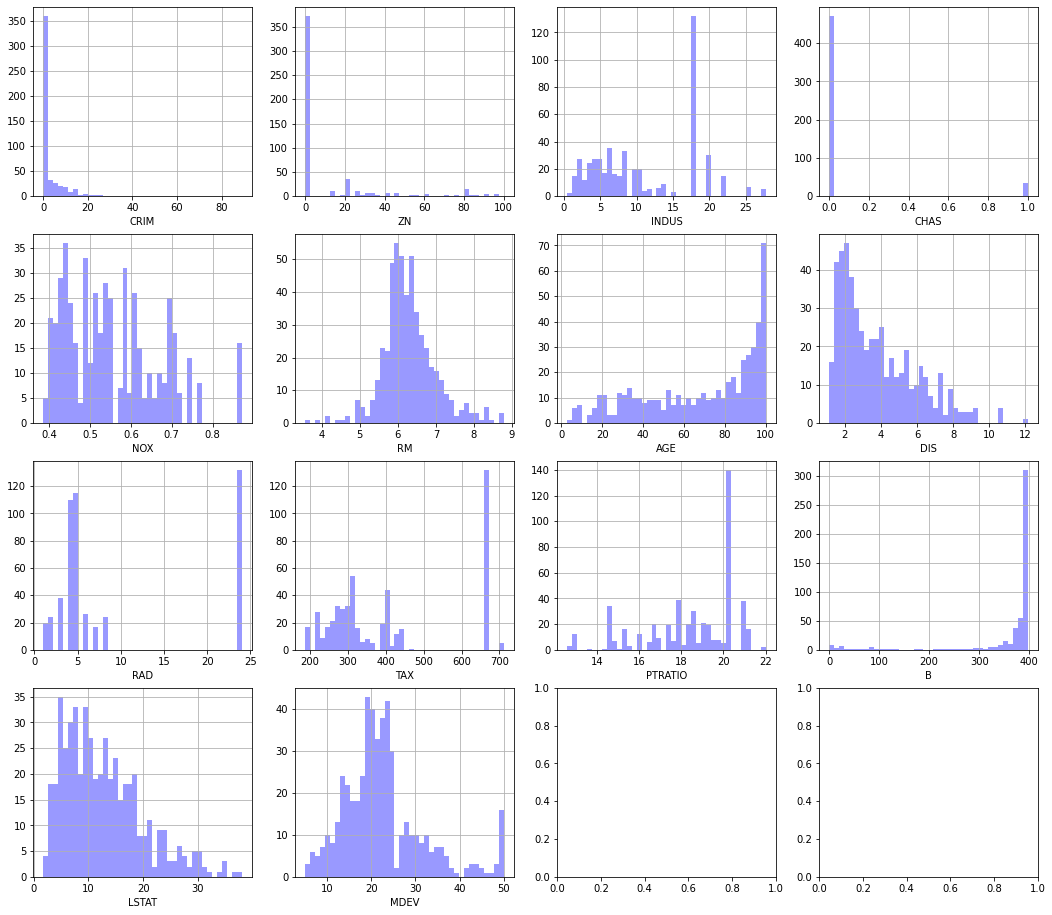

In [ ]:
def print_histograms(dataset):
    fig, axis = plt.subplots(4, 4, figsize=(18,16))
    sns.distplot(boston_dataframe['CRIM'], bins=40, ax=axis[0,0], color='blue', kde=False)
    axis[0,0].grid(True)
    sns.distplot(boston_dataframe['ZN'], bins=40, ax=axis[0,1], color='blue', kde=False)
    axis[0,1].grid(True)
    sns.distplot(boston_dataframe['INDUS'], bins=40, ax=axis[0,2], color='blue', kde=False)
    axis[0,2].grid(True)
    sns.distplot(boston_dataframe['CHAS'], bins=40, ax=axis[0,3], color='blue', kde=False)
    axis[0,3].grid(True)
    sns.distplot(boston_dataframe['NOX'], bins=40, ax=axis[1,0], color='blue', kde=False)
    axis[1,0].grid(True)
    sns.distplot(boston_dataframe['RM'], bins=40, ax=axis[1,1], color='blue', kde=False)
    axis[1,1].grid(True)
    sns.distplot(boston_dataframe['AGE'], bins=40, ax=axis[1,2], color='blue', kde=False)
    axis[1,2].grid(True)
    sns.distplot(boston_dataframe['DIS'], bins=40, ax=axis[1,3], color='blue', kde=False)
    axis[1,3].grid(True)
    sns.distplot(boston_dataframe['RAD'], bins=40, ax=axis[2,0], color='blue', kde=False)
    axis[2,0].grid(True)
    sns.distplot(boston_dataframe['TAX'], bins=40, ax=axis[2,1], color='blue', kde=False)
    axis[2,1].grid(True)
    sns.distplot(boston_dataframe['PTRATIO'], bins=40, ax=axis[2,2], color='blue', kde=False)
    axis[2,2].grid(True)
    sns.distplot(boston_dataframe['B'], bins=40, ax=axis[2,3], color='blue', kde=False)
    axis[2,3].grid(True)
    sns.distplot(boston_dataframe['LSTAT'], bins=40, ax=axis[3,0], color='blue', kde=False)
    axis[3,0].grid(True)
    sns.distplot(boston_dataframe['MDEV'], bins=40, ax=axis[3,1], color='blue', kde=False)
    axis[3,1].grid(True)
    plt.show()

print_histograms(boston_dataframe)

# Looking for correlations

In [ ]:
def compute_correlations_matrix(dataset):
  corr = boston_dataframe.corr(method = 'pearson')
  plt.figure(figsize=(20,18))
  sns.heatmap(corr, cmap="jet", annot=True)
  plt.xticks(rotation=90)
  return corr

correlations = compute_correlations_matrix(boston_dataframe)
correlations['MDEV'].sort_values(ascending=False)

In [ ]:
def print_scatter_matrix(dataset):
  pd.plotting.scatter_matrix(boston_dataframe, alpha=0.2, figsize=(25,20))
  plt.show()

print_scatter_matrix(boston_dataframe)

In [ ]:
def RM_MDEV_COOR(dataset):
  plt.figure(figsize=(9,7))
  plt.scatter(boston_dataframe['RM'], boston_dataframe['MDEV'], alpha=0.6)
  plt.xlabel("RM")
  plt.ylabel("MDEV")
  plt.show()
  
RM_MDEV_COOR(boston_dataframe)

In [ ]:
def MDEV_COORS(dataset):
  for i in boston_dataframe[['LSTAT', 'AGE', 'CRIM']]:
    plt.figure(figsize=(9,7))
    plt.scatter(boston_dataframe[i], boston_dataframe['MDEV'], alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('MDEV')
    plt.show()

MDEV_COORS(boston_dataframe)

### Correlation coefficients for LSTAT. And attributes most linearly related to the LSTAT.

In [ ]:
boston_dataframe.corrwith(boston_dataframe['LSTAT']).sort_values(ascending=False)

In [ ]:
def LSTAT(dataset):
  for i in boston_dataframe[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'MDEV']]:
    plt.figure(figsize=(9,7))
    plt.scatter(boston_dataframe[i], boston_dataframe['LSTAT'], alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('LSTAT')
    plt.yticks(rotation=90)
    plt.show()

LSTAT(boston_dataframe)

# Prediction

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
def boston_fit_model(dataset):
    model_dataset = dataset[["RM","MDEV"]]
    regressor = sklearn.linear_model.LinearRegression()
    x = model_dataset.iloc[:, :-1].values
    y = model_dataset.iloc[:, 1].values
    x_train_set, x_test_set, y_train_set, y_test_set = sklearn.model_selection.train_test_split(x, y, train_size=0.8, random_state=35)
    regressor.fit(x_train_set, y_train_set)
    return regressor

In [ ]:
def boston_predict(estimator, array_to_predict):
    result = estimator.predict(array_to_predict)
    return result

In [ ]:
data = [1, 2, 3]
data = np.array(data)
data = data.reshape(-1, 1)
estimator = boston_fit_model(boston_dataframe)
print(boston_predict(estimator, data))

[-26.91766936 -17.55747032  -8.19727128]


In [ ]:
def print_model_prediction_evaluator(base_test, prediction):
    print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(base_test, prediction))
    print('Mean Squared Error:', sklearn.metrics.mean_squared_error(base_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(base_test, prediction)))

In [ ]:
model_dataset = boston_dataframe[["RM","MDEV"]]
regressor = sklearn.linear_model.LinearRegression()
x = model_dataset.iloc[:, :-1].values
y = model_dataset.iloc[:, 1].values
x_train_set, x_test_set, y_train_set, y_test_set = sklearn.model_selection.train_test_split(x, y, train_size=0.8, random_state=35)

estimator = boston_fit_model(boston_dataframe)
prediction = boston_predict(estimator, x_train_set)
print_model_prediction_evaluator(y_train_set, prediction)

Mean Absolute Error: 4.6211677100092485
Mean Squared Error: 46.12733885999534
Root Mean Squared Error: 6.791711040672692
